In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
df = pd.read_csv('PBL5recommendationdata.csv', encoding = "ISO-8859-1")
df.drop_duplicates(inplace=True)
df

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
0,797,Christy,Dill,Company0,1426018724,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1437764306,0.0,3758,797,Christy,Dill,Company0,3758,NaN,NaN,NaN,USD,NaN,57.20,0.00,9.95,13.0,2.86,NaN,NaN,NaN,NaN,NaN,NaN,64.29,NaN,fedex,11|Ground,NaN,NaN,NaN,5.7204E+14,3.0,1.426019e+09,NaN,authorize.net,NaN,64.29,NaN,6993607863,510142,NaN,1,1426019099,1.438868e+09,1.426101e+09,NaN,Insured By Eye4Fraud,NaN,NaN,NaN,NaN,NaN,NaN,0.0,52

In [3]:
df.isnull().sum().head(200)

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [12]:
a = df.isnull().sum()
a[a>1]

Customers.company                 3467
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.customer_type            423
Orders.company                    3466
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.sales_rep                  4194
Orders.tax                         457
Orders.shipping                    195
Orders.coupon_id                  3312
Orders.coupon_amount              3312
Orders.gift_id                    4194
Orders.gift_amount                4194
Orders.fee_name                   3967
Orders.fee_amount                 3916
Orders.discount_name              3912
Orders.discount_amount            3830
Orders.balance_due       

In [4]:
df["Products.google_shopping_type"].nunique(),df["Order_Items.qty"].nunique(),df["Products.unit"].nunique()

(313, 23, 20)

In [5]:
a = abs(df.corr()["Orders.total"]).sort_values(ascending = False).head(30)


In [6]:
x1 = df[["Order_Items.product_name","Customers.create_date","Order_Items.qty","Order_Items.price",
         "Products.google_shopping_type","Orders.total","Orders.currency","Products.unit"]]

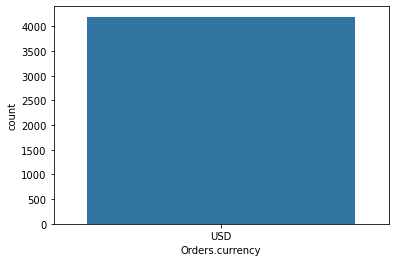

In [7]:
plt.figure()
sns.countplot(df["Orders.currency"])
plt.xticks();

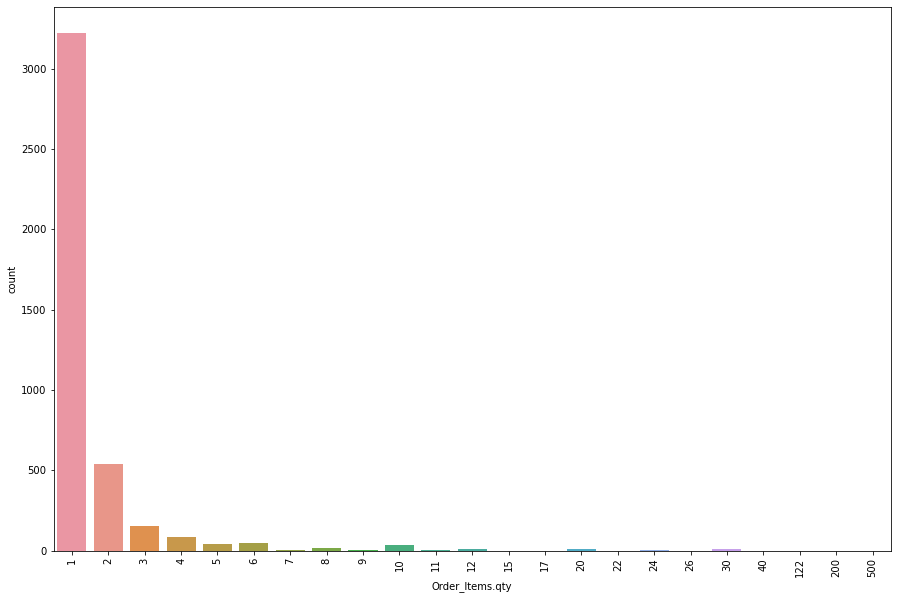

In [8]:
plt.figure(figsize = (15,10))
sns.countplot(df["Order_Items.qty"])
plt.xticks(rotation = 90);

In [9]:
x1 = pd.get_dummies(x1,drop_first=True)
model = KMeans(n_clusters = 5)
model = model.fit(x1)
pred = model.predict(x1)
x1["cluster"] = pred
x1.head()

,Customers.create_date,Order_Items.qty,Order_Items.price,Orders.total,Order_Items.product_name_1 Box Of Medline Commode Liners with Absorbent Pad,Order_Items.product_name_1 Pad of CURAD Mediplast Wart Pad,"Order_Items.product_name_1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","Order_Items.product_name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Order_Items.product_name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Order_Items.product_name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","Order_Items.product_name_100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",Order_Items.product_name_10215-s,Order_Items.product_name_12112-3,Order_Items.product_name_12124-3,"Order_Items.product_name_18"" Hamper Stands, Standard","Order_Items.product_name_19"" Flyweight Lightweight Blue Transport Wheelchair","Order_Items.product_name_2"" self-adhesive loop material, 10 yard dispenser box, tan","Order_Items.product_name_2"" self-adhesive loop material, 25 yard dispenser box, tan","Order_Items.product_name_2-Ply Tissue/Poly Professional Towels, White, Not Applicable",Order_Items.product_name_2000 Extra-Wide Wheelchairs,Order_Items.product_name_2000 Wheelchairs,"Order_Items.product_name_24 Hour Urine Collection Bottle, 3000.0 ML","Order_Items.product_name_3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","Order_Items.product_name_3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",Order_Items.product_name_3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,Order_Items.product_name_3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"Order_Items.product_name_3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","Order_Items.product_name_3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","Order_Items.product_name_3"" Wheels For Walkers","Order_Items.product_name_3/4"" Guardian Utility Tips, Gray","Order_Items.product_name_4-Panel Abdominal Binders, 2X-Large","Order_Items.product_name_4-Panel Abdominal Binders, Large/X-Large","Order_Items.product_name_5"" Wheels For Walkers","Order_Items.product_name_6 Cylinder Oxygen Carrier, M9 Cylinders",Order_Items.product_name_6' CPAP Tube,Order_Items.product_name_6-spring hand grip (each),Order_Items.product_name_6291hda Universal wheels part,"Order_Items.product_name_8"" Rear Walker Wheel Attachment","Order_Items.product_name_A&D Ointment by H & H Laboratories Inc, 384.00 ML",Order_Items.product_name_Accu-Therm Hot/Cold Gel Packs,Order_Items.product_name_Accu-Therm Insulated Hot Pack,Order_Items.product_name_Accu-Therm Non-Insulated Hot Pack,"Order_Items.product_name_Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Order_Items.product_name_Active Liquid Protein Nutritional Supplement, 0.0","Order_Items.product_name_Active Liquid Protein Nutritional Supplement, 30.000 OZ",Order_Items.product_name_AcuForce&reg; 7.0 Massage Tool,Order_Items.product_name_Adaptive Eating Utensils - Adaptive Fork,Order_Items.product_name_Addipak Sterile Saline Solution,Order_Items.product_name_Adjustable Angle Rotating Suction Cup Grab Bar,Order_Items.product_name_Adjustable Height ArmRest AK5ADJARMKIT,Order_Items.product_name_Adjustable Height Bathtub Grab Bar Safety Rail,Order_Items.product_name_Adjustable Height Home Bed Assist Handle,"Order_Items.product_name_Adjustable Height Rollator with 6"" Wheels, Red","Order_Items.product_name_Adjustable Height Teak Bath Bench Stool, Rectangular","Order_Items.product_name_Adjustable Height Teak Bath Bench Stool, Triangular",Order_Items.product_name_Adjustable Height Triangular Teak Bath Bench Stool,"Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Black","Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Blue Crackle","Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Red Crackle",Order_Items.product_name_A

In [10]:
allscore = []
allclusters = []
def clust(clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster +=1
        model = KMeans(n_clusters =no_of_cluster)
        pred = model.fit_predict(x1)
        score = silhouette_score(x1,pred)
        print("Number of cluster {}, silhouette {}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(10)

Number of cluster 2, silhouette 0.6536653011251081
Number of cluster 3, silhouette 0.6361052494484449
Number of cluster 4, silhouette 0.6262681031053362
Number of cluster 5, silhouette 0.5770158919211607
Number of cluster 6, silhouette 0.5768332925161342
Number of cluster 7, silhouette 0.5795668856110937
Number of cluster 8, silhouette 0.5655907853560624
Number of cluster 9, silhouette 0.5707476597914813
Number of cluster 10, silhouette 0.5639919765152678


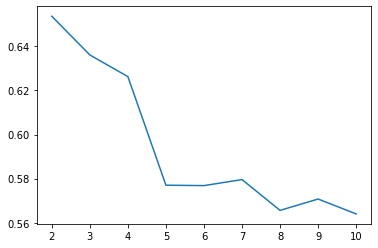

In [11]:
plt.plot(allclusters, allscore)